## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Loading the dataset

In [60]:
games = pd.read_excel("/Users/bene/Downloads/metacritic.xlsx")

In [4]:
games.head()

,game,platform,developer,genre,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,"Harry Potter and the Deathly Hallows, Part 2",PC,NaN,Action,T,2011-07-12,1,1,10,8,0,8,43,46
1,Cannon Fodder 3,PC,NaN,Strategy,NaN,2012-02-09,1,6,3,0,1,1,49,57
2,Seduce Me,PC,NaN,Strategy,AO,2013-01-02,0,5,7,2,0,4,41,34
3,Out of the Park Baseball 15,PC,NaN,Sports,NaN,2014-04-21,8,0,0,14,0,1,89,72
4,Outlast: Whistleblower,PC,NaN,Action Adventure,M,2014-05-06,6,6,0,20,5,3,73,79


## Data cleaning

In [5]:
games.isna().sum()

game                   0
platform               0
developer             14
genre                  5
rating              1266
release_date           0
positive_critics       0
neutral_critics        0
negative_critics       0
positive_users         0
neutral_users          0
negative_users         0
metascore              0
user_score             0
dtype: int64

In [26]:
games.drop(columns=["rating", "number_players"], inplace=True)

In [27]:
games[games["developer"].isna()]

,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,"Harry Potter and the Deathly Hallows, Part 2",PC,NaN,Action,2011-07-12,1,1,10,8,0,8,43,46
1,Cannon Fodder 3,PC,NaN,Strategy,2012-02-09,1,6,3,0,1,1,49,57
2,Seduce Me,PC,NaN,Strategy,2013-01-02,0,5,7,2,0,4,41,34
3,Out of the Park Baseball 15,PC,NaN,Sports,2014-04-21,8,0,0,14,0,1,89,72
4,Outlast: Whistleblower,PC,NaN,Action Adventure,2014-05-06,6,6,0,20,5,3,73,79
5,Dead Nation,VITA,NaN,Action,2014-04-15,6,8,0,4,1,4,68,79
6,Memento Mori 2,PC,NaN,NaN,2014-05-13,0,0,0,0,0,0,65,75
7,Dead Rising 3: Operation Broken Eagle,XONE,NaN,Action,2014-01-21,1,12,3,2,4,5,52,42
8,Destiny: The Taken King,PS4,NaN,NaN,2015-09-15,0,0,0,0,0,0,86,62
9,3D Fantasy Zone II W,3DS,NaN,NaN,2015-04-16,0,0,0,0,0,0,81,70


#### Dropping rows with no developers and genres

In [ ]:
games.drop(labels=[n for n in range(0, 14)], inplace=True)

## EDA

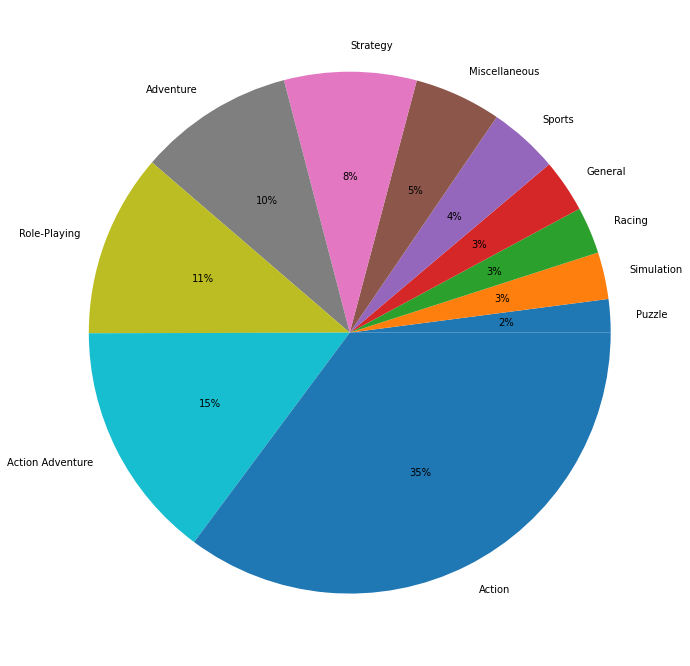

In [29]:
#count occurences of each genre and platform
genres = games['genre'].value_counts().sort_values(ascending=True)
platforms = games['platform'].value_counts().sort_values(ascending=True)

#filter out genres with less than 100 occurences and group them in an "Other category" ("Misc" has 282)
large_genres = genres[genres > 100] 

#display data
plt.figure(figsize=[12, 12])
plt.pie(large_genres.values, labels=large_genres.index, autopct='%1.0f%%')
plt.show()


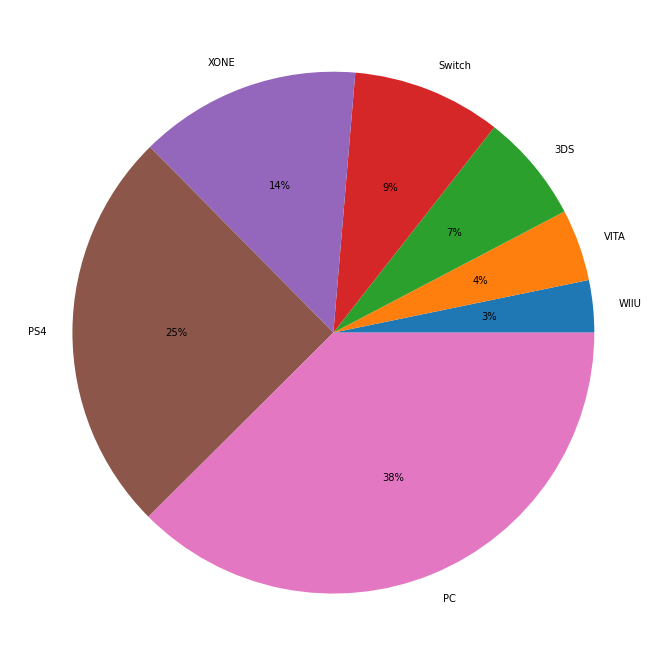

In [30]:
plt.figure(figsize=[12, 12])
plt.pie(platforms.values, labels=platforms.index, autopct='%1.0f%%')
plt.show()

## Data preprocessing

#### Looking to filter on developers

In [31]:
game_dev_count = games[["developer", "game"]].groupby(["developer"], as_index=False).agg("count")
dev_shortlist = game_dev_count.sort_values(by="game", ascending=False)[:26]
dev_shortlist # Here is a list of the developers with 20+ games

,developer,game
1802,Telltale Games,143
301,Capcom,98
1190,Nintendo,49
1933,Ubisoft Montreal,47
1764,TT Games,42
155,Bandai Namco Games,41
534,EA Sports,39
1689,Square Enix,39
1257,Omega Force,36
355,Codemasters,36


In [32]:
dev_list = dev_shortlist["developer"].to_list()
dev_list

['Telltale Games',
 'Capcom',
 'Nintendo',
 'Ubisoft Montreal',
 'TT Games',
 'Bandai Namco Games',
 'EA Sports',
 'Square Enix',
 'Omega Force',
 'Codemasters',
 'Ubisoft',
 'Zen Studios',
 'Konami',
 'DONTNOD Entertainment',
 'Blizzard Entertainment',
 'Arc System Works',
 'Daedalic Entertainment',
 'EA DICE',
 'Double Fine Productions',
 'Milestone S.r.l',
 'Level 5',
 'From Software',
 'Nippon Ichi Software',
 'Sega',
 'WayForward',
 'Falcom']

#### Creating a dataframe with only the developers with 20+ games

In [42]:
games_clean = games[games["developer"].isin(dev_list)]
games_clean

,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month
254,BlazBlue: Continuum Shift II,3DS,Arc System Works,Action,2011-05-31,3,9,2,3,1,1,64,62,5
255,BlazBlue: Continuum Shift Extend,VITA,Arc System Works,Action,2012-02-14,26,2,0,11,2,0,83,75,2
256,Guilty Gear Xrd -SIGN-,PS4,Arc System Works,Action,2014-12-16,29,4,0,17,1,0,84,79,12
257,Magical Beat,VITA,Arc System Works,Action,2014-06-17,1,8,0,0,0,0,67,63,6
259,Dragon Ball Z: Extreme Butoden,3DS,Arc System Works,Action,2015-10-20,2,28,2,2,3,0,61,70,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,CastleStorm: Virtual Reality,PS4,Zen Studios,Strategy,2017-08-01,5,6,0,0,0,1,72,38,8
5662,Infinite Minigolf,Switch,Zen Studios,Sports,2017-08-03,2,5,0,2,3,4,66,58,8
5663,Pinball FX3: Bethesda Pinball,Switch,Zen Studios,Action,2018-04-04,6,2,0,0,0,0,80,76,4
5664,CastleStorm,Switch,Zen Studios,Strategy,2018-08-16,7,2,0,0,0,0,77,78,8


In [45]:
games_clean.isna().sum()

game                0
platform            0
developer           0
genre               0
release_date        0
positive_critics    0
neutral_critics     0
negative_critics    0
positive_users      0
neutral_users       0
negative_users      0
metascore           0
user_score          0
release_month       0
dtype: int64

#### Adding in release_month and release_year column

In [61]:
games_clean["release_month"] = games_clean["release_date"].dt.month
games_clean["release_year"] = games_clean["release_date"].dt.year
games_clean

/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_9264/180073220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean["release_month"] = games_clean["release_date"].dt.month
/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_9264/180073220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean["release_year"] = games_clean["release_date"].dt.year


,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,BlazBlue: Continuum Shift II,3DS,Arc System Works,Action,2011-05-31,3,9,2,3,1,1,64,62,5,2011
255,BlazBlue: Continuum Shift Extend,VITA,Arc System Works,Action,2012-02-14,26,2,0,11,2,0,83,75,2,2012
256,Guilty Gear Xrd -SIGN-,PS4,Arc System Works,Action,2014-12-16,29,4,0,17,1,0,84,79,12,2014
257,Magical Beat,VITA,Arc System Works,Action,2014-06-17,1,8,0,0,0,0,67,63,6,2014
259,Dragon Ball Z: Extreme Butoden,3DS,Arc System Works,Action,2015-10-20,2,28,2,2,3,0,61,70,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,CastleStorm: Virtual Reality,PS4,Zen Studios,Strategy,2017-08-01,5,6,0,0,0,1,72,38,8,2017
5662,Infinite Minigolf,Switch,Zen Studios,Sports,2017-08-03,2,5,0,2,3,4,66,58,8,2017
5663,Pinball FX3: Bethesda Pinball,Switch,Zen Studios,Action,2018-04-04,6,2,0,0,0,0,80,76,4,2018
5664,CastleStorm,Switch,Zen Studios,Strategy,2018-08-16,7,2,0,0,0,0,77,78,8,2018


#### Correlation heatmap

<AxesSubplot:>

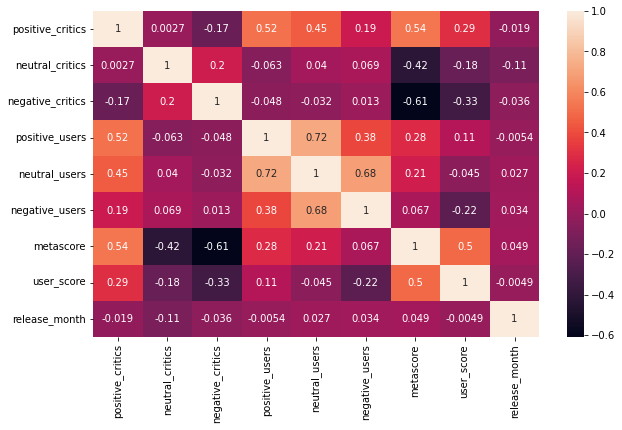

In [59]:
plt.figure(figsize=[10, 6])
sns.heatmap(games_clean.corr(), annot=True)

#### Time-series user score forecast

In [99]:
release_date_score = games[["release_date", "metascore"]].groupby(["release_date"]).agg("mean")
release_date_score

,metascore
release_date,
2011-01-03,56.000000
2011-01-11,72.000000
2011-01-13,79.000000
2011-01-23,75.000000
2011-01-24,82.000000
...,...
2019-03-20,71.000000
2019-03-21,74.000000
2019-03-22,88.750000


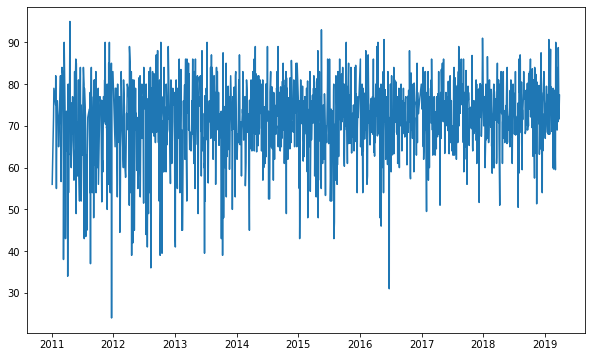

In [158]:
plt.figure(figsize=[10, 6])
x = release_date_score.index
y = np.array(release_date_score["metascore"])
plt.plot(x, y)

In [186]:
from pmdarima.arima import auto_arima

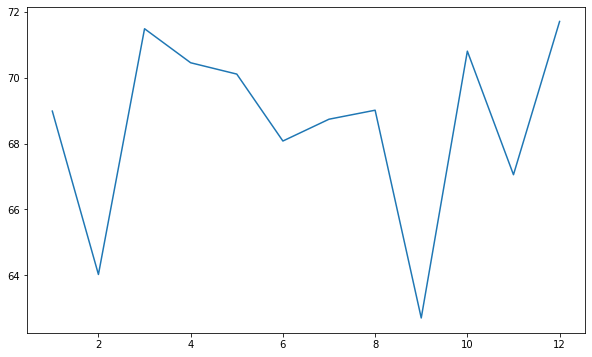

In [98]:
release_score = games_clean[["release_month", "user_score"]].groupby(["release_month"], as_index=False).agg("mean")

plt.figure(figsize=[10, 6])
x = release_score["release_month"]
y = np.array(release_score["user_score"])
plt.plot(x, y)

In [189]:
release_date_score['release_date'] = release_date_score.index

In [216]:
#### Auto-arima
train = release_date_score[release_date_score['release_date'] < pd.to_datetime("2019-01", format='%Y-%m')]
test = release_date_score[release_date_score['release_date'] >= pd.to_datetime("2019-01", format='%Y-%m')]
train['train'] = train['metascore']
del train["metascore"]
del train["Date"]
train

/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_9264/1796443565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['metascore']


,release_date,train
release_date,,
2011-01-03,2011-01-03,56.0
2011-01-11,2011-01-11,72.0
2011-01-13,2011-01-13,79.0
2011-01-23,2011-01-23,75.0
2011-01-24,2011-01-24,82.0
...,...,...
2018-12-18,2018-12-18,73.0
2018-12-20,2018-12-20,64.0
2018-12-21,2018-12-21,75.5


In [254]:
del test["Date"]
test

,metascore,release_date
release_date,,
2019-01-04,67.000000,2019-01-04
2019-01-05,73.000000,2019-01-05
2019-01-10,76.142857,2019-01-10
2019-01-11,79.500000,2019-01-11
2019-01-15,70.000000,2019-01-15
2019-01-17,68.400000,2019-01-17
2019-01-18,77.500000,2019-01-18
2019-01-22,68.000000,2019-01-22
2019-01-23,77.600000,2019-01-23


In [193]:
import pmdarima

In [206]:
from pmdarima.arima import auto_arima

model = auto_arima(train["train"], trace=True, error_action='ignore', suppress_warnings=True,  seasonal=True, m=12)
model.fit(train["train"])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12269.282, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11898.854, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12267.285, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=11896.865, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=11898.854, Time=0.33 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=11900.859, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=11694.348, Time=0.27 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=11696.337, Time=1.05 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=11696.336, Time=0.74 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=11697.443, Time=3.06 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=11586.355, Time=0.37 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=11588.225, Time=0.73 sec
 ARIMA(3,1,0)(0,0

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

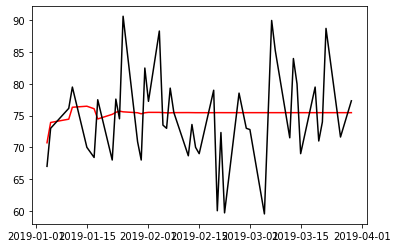

In [212]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])
forecast

plt.plot(forecast["Prediction"], color="red")
plt.plot(test["metascore"], color="black")

In [251]:
train

,release_date,train
release_date,,
2011-01-03,2011-01-03,56.0
2011-01-11,2011-01-11,72.0
2011-01-13,2011-01-13,79.0
2011-01-23,2011-01-23,75.0
2011-01-24,2011-01-24,82.0
...,...,...
2018-12-18,2018-12-18,73.0
2018-12-20,2018-12-20,64.0
2018-12-21,2018-12-21,75.5


In [252]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train["release_date"], train["train"])

ValueError: Expected 2D array, got 1D array instead:
array=['2011-01-03T00:00:00.000000000' '2011-01-11T00:00:00.000000000'
 '2011-01-13T00:00:00.000000000' ... '2018-12-21T00:00:00.000000000'
 '2018-12-24T00:00:00.000000000' '2018-12-27T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [225]:
train

,release_date,train
release_date,,
2011-01-03,2011-01-03,56.0
2011-01-11,2011-01-11,72.0
2011-01-13,2011-01-13,79.0
2011-01-23,2011-01-23,75.0
2011-01-24,2011-01-24,82.0
...,...,...
2018-12-18,2018-12-18,73.0
2018-12-20,2018-12-20,64.0
2018-12-21,2018-12-21,75.5


In [224]:
test["metascore"]

release_date
2019-01-04    67.000000
2019-01-05    73.000000
2019-01-10    76.142857
2019-01-11    79.500000
2019-01-15    70.000000
2019-01-17    68.400000
2019-01-18    77.500000
2019-01-22    68.000000
2019-01-23    77.600000
2019-01-24    74.500000
2019-01-25    90.666667
2019-01-29    70.875000
2019-01-30    68.000000
2019-01-31    82.500000
2019-02-01    77.250000
2019-02-04    88.333333
2019-02-05    73.500000
2019-02-06    73.000000
2019-02-07    79.333333
2019-02-08    75.500000
2019-02-12    68.666667
2019-02-13    73.600000
2019-02-14    70.000000
2019-02-15    69.000000
2019-02-19    79.000000
2019-02-20    60.000000
2019-02-21    72.333333
2019-02-22    59.666667
2019-02-26    78.545455
2019-02-28    73.000000
2019-03-01    72.800000
2019-03-05    59.500000
2019-03-07    90.000000
2019-03-08    85.250000
2019-03-12    71.500000
2019-03-13    84.000000
2019-03-14    80.000000
2019-03-15    69.000000
2019-03-19    79.500000
2019-03-20    71.000000
2019-03-21    74.000000
201

In [249]:
x = np.array(test["release_date"])
y = np.array(test["metascore"])
lr.fit(train.drop(columns=["train"]), train["train"])

#forecast_lr = lr.predict(x.reshape(-1, 1))
x

array(['2019-01-04T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-01-11T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-17T00:00:00.000000000',
       '2019-01-18T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-29T00:00:00.000000000',
       '2019-01-30T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-04T00:00:00.000000000',
       '2019-02-05T00:00:00.000000000', '2019-02-06T00:00:00.000000000',
       '2019-02-07T00:00:00.000000000', '2019-02-08T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-13T00:00:00.000000000',
       '2019-02-14T00:00:00.000000000', '2019-02-15T00:00:00.000000000',
       '2019-02-19T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-02-21T00:00:00.000000000', '2019-02-22

In [241]:
x = np.array([2.0 , 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7])
y = np.array([196, 221, 136, 255, 244, 230, 232, 255, 267])

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

print(lr.predict([[2.4]]))

[198.36539227]


In [222]:

forecast_lr = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])
forecast_lr

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[67.         73.         76.14285714 79.5        70.         68.4
 77.5        68.         77.6        74.5        90.66666667 70.875
 68.         82.5        77.25       88.33333333 73.5        73.
 79.33333333 75.5        68.66666667 73.6        70.         69.
 79.         60.         72.33333333 59.66666667 78.54545455 73.
 72.8        59.5        90.         85.25       71.5        84.
 80.         69.         79.5        71.         74.         88.75
 71.625      77.33333333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Time-series meta-score forecast

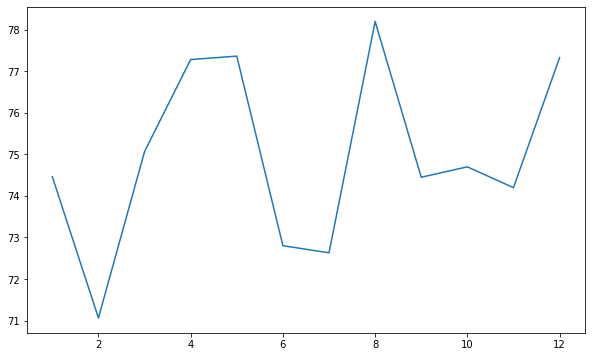

In [56]:
release_score = games_clean[["release_month", "metascore"]].groupby(["release_month"], as_index=False).agg("mean")

plt.figure(figsize=[10, 6])
x = release_score["release_month"]
y = np.array(release_score["metascore"])
plt.plot(x, y)

#### Encoding

In [67]:
# I create a new dataset with the datetime dropped, and separate year and month columns instead
# games_clean.drop(columns=["release_date"], inplace=True)
games_clean

,game,platform,developer,genre,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,BlazBlue: Continuum Shift II,3DS,Arc System Works,Action,3,9,2,3,1,1,64,62,5,2011
255,BlazBlue: Continuum Shift Extend,VITA,Arc System Works,Action,26,2,0,11,2,0,83,75,2,2012
256,Guilty Gear Xrd -SIGN-,PS4,Arc System Works,Action,29,4,0,17,1,0,84,79,12,2014
257,Magical Beat,VITA,Arc System Works,Action,1,8,0,0,0,0,67,63,6,2014
259,Dragon Ball Z: Extreme Butoden,3DS,Arc System Works,Action,2,28,2,2,3,0,61,70,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,CastleStorm: Virtual Reality,PS4,Zen Studios,Strategy,5,6,0,0,0,1,72,38,8,2017
5662,Infinite Minigolf,Switch,Zen Studios,Sports,2,5,0,2,3,4,66,58,8,2017
5663,Pinball FX3: Bethesda Pinball,Switch,Zen Studios,Action,6,2,0,0,0,0,80,76,4,2018
5664,CastleStorm,Switch,Zen Studios,Strategy,7,2,0,0,0,0,77,78,8,2018


In [73]:
from sklearn import preprocessing
games_new = games_clean.apply(preprocessing.LabelEncoder().fit_transform)
games_new

,game,platform,developer,genre,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,68,0,0,1,3,9,2,3,1,1,29,47,4,0
255,67,4,0,1,26,2,0,11,2,0,48,60,1,1
256,209,2,0,1,29,4,0,17,1,0,49,64,11,3
257,293,4,0,1,1,8,0,0,0,0,32,48,5,3
259,130,0,0,1,2,28,2,2,3,0,26,55,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,81,2,25,30,5,6,0,0,0,1,37,23,7,6
5662,241,3,25,29,2,5,0,2,3,4,31,43,7,6
5663,388,3,25,1,6,2,0,0,0,0,45,61,3,7
5664,79,3,25,30,7,2,0,0,0,0,42,63,7,7


In [94]:

games_new["metascore_bins"] = pd.cut(x=games_new["metascore"], labels=[1, 2, 3, 4, 5], bins = 5) #right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
games_new["metascore_bins"].value_counts()

4    520
3    227
5    160
2     49
1     15
Name: metascore_bins, dtype: int64

#### Splitting the data

In [87]:
y.value_counts()[:20]

45    56
42    53
38    48
40    47
47    45
39    44
36    43
43    43
41    41
37    41
49    39
46    38
48    36
35    33
34    32
44    28
51    28
50    24
32    23
52    20
Name: metascore, dtype: int64

In [106]:
games_new["metascore_bins"].value_counts()

4    520
3    227
5    160
2     49
1     15
Name: metascore_bins, dtype: int64

In [160]:
from sklearn.model_selection import train_test_split

x = games_new.drop(columns=["metascore", "user_score", "metascore_bins"])
y = games_new["metascore_bins"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Using tpot classifier to determine best pipeline

In [97]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(verbosity=2, max_time_mins=5)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

                                                                              
Generation 1 - Current best internal CV score: 0.8375765095119935
                                                                              
5.02 minutes have elapsed. TPOT will close down.                              
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=5, min_samples_split=3, n_estimators=100)
0.8461538461538461


In [161]:
from sklearn.ensemble import ExtraTreesClassifier

In [162]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)

In [163]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_features=0.9000000000000001,
                     min_samples_leaf=5, min_samples_split=3)

In [164]:
y_pred = etc.predict(x_test)
y_pred

array([5, 4, 2, 2, 4, 4, 3, 3, 4, 4, 4, 4, 5, 4, 5, 2, 4, 3, 5, 5, 4, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 5, 5, 3,
       4, 3, 2, 4, 4, 3, 4, 1, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 5, 3,
       4, 4, 5, 4, 4, 4, 5, 4, 4, 3, 5, 3, 5, 2, 4, 5, 4, 5, 5, 4, 2, 4,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 5, 4, 2, 3, 5, 5, 4, 4, 5, 3, 1, 4,
       4, 5, 4, 4, 4, 5, 3, 5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 2, 4, 3, 5, 3,
       4, 4, 1, 4, 1, 4, 5, 4, 4, 3, 5, 4, 3, 4, 4, 4, 2, 4, 3, 4, 3, 5,
       3, 3, 4, 4, 3, 3, 4, 5, 4, 4, 4, 3, 4, 2, 3, 5, 3, 2, 4, 4, 1, 4,
       4, 4, 5, 5, 4, 3, 4, 3, 4, 4, 4, 4, 5, 3, 5, 4, 2, 4, 4])

In [165]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for Extra Trees Classifier is:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      0.91      0.87        11
           3       0.67      0.83      0.74        36
           4       0.89      0.76      0.82       108
           5       0.73      0.83      0.78        36

    accuracy                           0.80       195
   macro avg       0.78      0.87      0.82       195
weighted avg       0.82      0.80      0.80       195



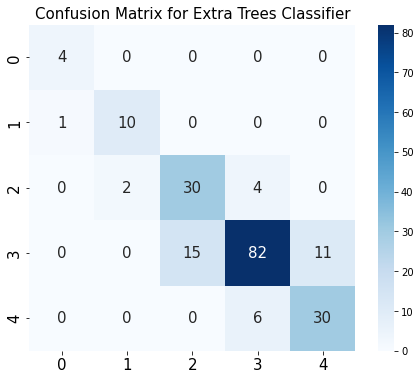

In [166]:
generate_results(etc, y_pred, 'Extra Trees Classifier')

#### Under-sampling using NearMiss

In [167]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss()
x_nm, y_nm = undersample.fit_resample(x, y)

In [168]:
x_train_nm, x_test_nm, y_train_nm, y_test_nm = train_test_split(x_nm, y_nm, test_size=0.2)

In [169]:
etc_nm = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)

In [170]:
etc_nm.fit(x_train_nm, y_train_nm)

ExtraTreesClassifier(class_weight='balanced', max_features=0.9000000000000001,
                     min_samples_leaf=5, min_samples_split=3)

In [171]:
y_pred_nm = etc_nm.predict(x_test_nm)
y_pred_nm

array([3, 2, 1, 4, 4, 5, 1, 1, 3, 5, 2, 3, 4, 5, 4])

In [179]:
cl_rep_nm = classification_report(y_test_nm, y_pred_nm)
cl_rep_nm

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         3\n           2       0.50      0.50      0.50         2\n           3       0.67      0.50      0.57         4\n           4       0.75      1.00      0.86         3\n           5       1.00      1.00      1.00         3\n\n    accuracy                           0.80        15\n   macro avg       0.78      0.80      0.79        15\nweighted avg       0.79      0.80      0.79        15\n'

In [180]:
cm_model_nm = confusion_matrix(y_test_nm, y_pred_nm)
cm_model_nm

array([[3, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 2, 1, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 3]])

In [181]:
print("\nThe classification report for " + "Extra Trees Classifier with under-sampling" + " is:", cl_rep_nm, sep = "\n")


The classification report for Extra Trees Classifier with under-sampling is:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      0.50      0.50         2
           3       0.67      0.50      0.57         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3

    accuracy                           0.80        15
   macro avg       0.78      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15



#### Over-sampling using SMOTE

In [150]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_sm, y_sm = oversample.fit_resample(x, y)

In [151]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size= 0.2)

In [152]:
etc_sm = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)
etc_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = etc_sm.predict(x_test_sm)

In [182]:
cl_rep_sm = classification_report(y_test_sm, y_pred_sm)
cl_rep_sm

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        90\n           2       0.97      0.99      0.98       104\n           3       0.93      0.89      0.91       109\n           4       0.86      0.85      0.86        95\n           5       0.94      0.97      0.95       122\n\n    accuracy                           0.94       520\n   macro avg       0.94      0.94      0.94       520\nweighted avg       0.94      0.94      0.94       520\n'

In [185]:
cm_model_sm = confusion_matrix(y_test_sm, y_pred_sm)
cm_model_sm

array([[ 90,   0,   0,   0,   0],
       [  0, 103,   1,   0,   0],
       [  0,   3,  97,   9,   0],
       [  0,   0,   6,  81,   8],
       [  0,   0,   0,   4, 118]])

In [183]:
print("\nThe classification report for " + "Extra Trees Classifier with over-sampling" + " is:", cl_rep_sm, sep = "\n")


The classification report for Extra Trees Classifier with over-sampling is:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90
           2       0.97      0.99      0.98       104
           3       0.93      0.89      0.91       109
           4       0.86      0.85      0.86        95
           5       0.94      0.97      0.95       122

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520

